#### 분류평가
- 정확도만으로 불균형한 레이블 데이터 세트에서 평가지표로 사용하기에는 부적합
- 정확도가 가지는 분류 평가 지표로의 한계점을 극복하기 위해 여러가지 분류 지표와 함께 적용해야 함</BR></BR>

#### Confusion Matrix(혼동행렬, 오차행렬)
- 이진분류에서 성능 지표로 잘 활용되는 오차행렬은 학습된 분류 모델이 예측을 수행하면 얼마나 혼동될 수 있는지도 함께 보여주는 지표
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 보여줌</BR></BR>

#### 평가 지표
- TP, FP, FN, TN 예측클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
- 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 N/P는 예측 결과값이 부정/긍정을 의미</BR></BR>
- 정확도 = (TP + TN) / (TP + TN + FP + FN)</BR></BR>
- 정밀도 = TP / (TP + FP) : 실제P / P로 맞게 예측 + 실제 N인데 P로 잘못 예측
    - 예측 값과 실제 값이 Positive로 일치한 데이터 건수 / 예측을 Positive로 한 모든 데이터 건수
    - 양성 예측도</BR></BR>
- 재현율 = TP / (TP + FN) : 실제P / P로 맞게 예측 + 실제 P인데 N으로 잘못 예측
    - 예측 값과 실제 값이 Positive로 일치한 데이터 건수 / 실제 값이 Positive인 모든 데이터 건수
    - 민감도(Sensitivity) 또는 TPR(True Positive Rate)</BR></BR>

- 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive 예측 Negative)를 낮추는 데, 정밀도는 FP(실제 Negative 예측 Positive)를 낮추는 데 초점을 맞춘다.
    - 이와 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다.
    - 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다.
    - 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과는 바람직하지 않다.</BR></BR>
- 재현율이 중요 지표인 경우 : 양성 데이터를 음성으로 잘못 판단하면 업무상 큰 영향이 발생하는 경우(암진단, 보험사기)
- 정밀도가 더 중요한 지표인 사례 : 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생.
- F1 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐</BR></BR>
#### 정밀도 및 재현율 활용 시 유의사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
- 정밀도 100%가 되는 방법 : 확실한 기준이 되는 경우만 P로 예측하고 나머지는 모두 N로 예측 TP/(TP+FP) = 1/(1+0) = 1
- 재현율이 100%가 되는 방법 : 실제 양성 1000명중 30명 TP/(TP + FN) = 30/(30 + 0) = 1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 불만과 불평이 커지게 됨

In [28]:
import numpy as np
from sklearn.base import BaseEstimator
class MyDummyClassifier(BaseEstimator):
    # fit() 아무것도 학습하지 않음
    def fit(self, x, y = None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1남성이면 0(사망), 그렇지 않으면(여성) 1(생존)으로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./dataset/train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions))) 

Dummy Classifier의 정확도는 : 0.7877


### 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다 
- 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 사용해야 함 (오차행렬, 정밀도, 재현률, F1스코어, ROC AUC 등)
- 불균형한 데이터 세트에서 정확도보다 정밀도(Precision)와 재현율(Recall)이 더 선호되는 평가 지표이다.

### 오차행렬 
- TN : 예측값을 Negative(0)로 예측했고 실제 값 역시 Negative(0)
- FP : 예측값을 Positive(1)로 예측했고 실제 값은 Negative(0)
- FN : 예측값을 Negative(0)로 예측했고 실제 값은 Positive(1)
- TP : 예측값을 Positive(1)로 예측했고 실제 값 역시 Positive(1)
     - 위의 값들을 조합하여 Classifier의 성능을 측정하는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있다.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred): # 실제값, 예측값을 인자로 받음
    confusion = confusion_matrix(y_test,pred) # 오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
#     print(f'오차행렬: \n {confusion}')
#     print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)}')

In [12]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


def fillnas(df):
    def callname(x):
        m = re.compile('[A-Za-z]+[.]')
        p = re.findall(m,x)
        return p[0]
    
    df['Callname']=df.Name.apply(lambda x:callname(x))
    
    df1 = df.loc[df.Age.isnull()]
    age_nulllist = list(set(df1.Callname.values.tolist()))
    
    df2 = df.loc[df.Age.notnull()]
    pivot = pd.pivot_table(df2, index = 'Callname', values = 'Age',aggfunc = 'mean')
    
    for age in age_nulllist:
        df.loc[(df.Age.isnull())&(df.Callname == age),['Age']]=(pivot.loc[age][0])
        
    df['Embarked'].fillna(method = 'ffill',inplace=True)
    
    df3 = df.loc[df.Cabin.notnull()]

    df3['Cabins'] = df3['Cabin'].str[:1]
    df4 = df.loc[df.Cabin.isnull()]
    
    for i in range(1,4):
        df33 = df3.loc[df3.Pclass == i]
        cabin_fill_list=list(set(df33.Cabins.values.tolist()))
        df44 = df4.loc[df4.Pclass == i]
        fill_index = list(df44.index)
        for index in fill_index:
            df.loc[index,'Cabin'] = np.random.choice(cabin_fill_list)
            
    return df

# 불필요 항목 제거
def drop_feat(df):
    df.drop(['PassengerId','Name','Ticket','Callname'],axis=1,inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    scaler = MinMaxScaler()
    scaler.fit(df[['Fare']])
    fare_scaled = scaler.transform(df[['Fare']])
    df['Fare'] = fare_scaled
    
    return df

def transform_features(df):
    df = fillnas(df)
    df = drop_feat(df)
    df = format_features(df)
    return df

In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

t_df = pd.read_csv('./dataset/train.csv')
y_t_df = t_df['Survived']
X_t_df = t_df.drop('Survived',axis=1)
X_t_df = transform_features(X_t_df)
X_t_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,0.014151,5,2
1,1,0,38.0,1,0,0.139136,2,0
2,3,0,26.0,0,0,0.015469,5,2
3,1,0,35.0,1,0,0.103644,2,2
4,3,1,35.0,0,0,0.015713,4,2


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터를 불러오고 학습 데이터와 테스트 데이터로 분류한다.
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression() # 객체 생성

lr_clf.fit(X_train, y_train) # 학습
pred = lr_clf.predict(X_test) # 예측
get_clf_eval(y_test,pred) # 평가  -> 인자값으로 (테스트값, 예측값) 
# 정밀도(Precision)에 비해 재현율(Recall)이 낮게 나옴 --> 재현율 또는 정밀도를 좀 더 강화시킬 방법은?
# 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.

오차행렬: 
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1 score: 0.7966


In [38]:
# Q. 오차행렬을 보고 수작업으로 계산하여 아래를 구하세요.
# TN 예측 사망 실제 사망  -> 예측 N 실제 N 
# FP 예측 생존 실제 사망  -> 예측 P 실제 N
# FN 예측 사망 실제 생존  -> 예측 N 실제 P
# TP 예측 생존 실제 생존  -> 예측 P 실제 P
TN = 109; FP=9; FN=15; TP=46; 
accuracy = round((TP+TN)/(TP+TN+FP+FN),4)
precision = round((TP)/(TP+FP),4) # 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
recall = round((TP)/(TP+FN),4) # 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 score :',round( 2*(precision*recall)/(precision+recall),4))

accuracy : 0.8659
precision : 0.8364
recall : 0.7541
f1 score : 0.7931


In [39]:
# Precision/Recall Trade-off
# Precision이 올라가면 fp가 작아짐 
# fp가 작아진다는 의미는? positive로 예측을 하는것을 적게 > 예측을 많이하다보면 잘못 예측할 가능성이 많음
# positive로 많이 예측하면 negative는 적게
# precision이 커지면 recall은 작아짐 -> fn이 커진다는 의미
# fp가 작아지면 fn은 커짐

# predict_proba() 메서드
pred_proba = lr_clf.predict_proba(X_test)
# predict() 메서드
pred = lr_clf.predict(X_test)

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result[:3]

array([[0.52671987, 0.47328013, 0.        ],
       [0.8875363 , 0.1124637 , 0.        ],
       [0.88451059, 0.11548941, 0.        ]])

In [40]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# x의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
# threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성
binarizer = Binarizer(threshold=1.1)

# Binarizer 객체의 fit_transform() 메서드를 이용해 numpy ndarray를 입력하면 입력 값이랑 threshold를 비교
# threshold와 같거나 작으면 0  크면 1 반환
print(binarizer.fit_transform(X)) 

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [43]:
# Binarizer의 threshold 설정값을 0.5로 설정 (분류 결정 임곗값)
custom_threshold = 0.5

# preict_proba() 반환값의 두번째 컬럼, 즉 positive 클래스 컬럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
# print(custom_predict)
get_clf_eval(y_test,custom_predict)

오차 행렬
[[107  11]
 [ 14  47]]
정확도 : 0.8603, 정밀도: 0.8103, 재현율: 0.7705


In [44]:
# 분류 결정 임계값을 0.5 -> 0.4로 낮춤
custom_threshold = 0.4

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict
get_clf_eval(y_test,custom_predict) # 재현율은 올라가고 정밀도는 떨어짐 =>  TradeOff 관계

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [10]:
# Q. 임계값을 [0.4, 0.45, 0.50, 0.55, 0.60] 으로 변경 시 각 평가지표의 변화를 출력하세요.

In [45]:
# test할 임곗값을 리스트 객체에 저장
custom_threshold_list = [0.4, 0.45, 0.50, 0.55, 0.60]

for i in custom_threshold_list:
    binarizer = Binarizer(threshold=i).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print('임곗값:', i)
    
    result = get_clf_eval (y_test, custom_predict)
    print()

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도: 0.7042, 재현율: 0.8197

임곗값: 0.45
오차 행렬
[[102  16]
 [ 13  48]]
정확도 : 0.8380, 정밀도: 0.7500, 재현율: 0.7869

임곗값: 0.5
오차 행렬
[[107  11]
 [ 14  47]]
정확도 : 0.8603, 정밀도: 0.8103, 재현율: 0.7705

임곗값: 0.55
오차 행렬
[[110   8]
 [ 15  46]]
정확도 : 0.8715, 정밀도: 0.8519, 재현율: 0.7541

임곗값: 0.6
오차 행렬
[[112   6]
 [ 17  44]]
정확도 : 0.8715, 정밀도: 0.8800, 재현율: 0.7213



### F1스코어
 - f1_score()
 - 정밀도와 재현율을 결합한 지표
 - 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print(f'f1 score: {round(f1,4)}')

f1 score: 0.7966


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(f'오차행렬: \n {confusion}')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)}, f1 score: {round(f1,4)}')

In [17]:
get_clf_eval(y_test,pred)

오차행렬: 
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1 score: 0.7966


In [43]:
# [과제] 임곗값을 0 ~ 1로 변경시킬 때 precision과 recall의 변화 추세를 시각화하여 출력하세요
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1): 
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1) # pred_proba_c1 0이냐 1이냐를 반환해주는 확률
    
    # X축을 threshold값으로, Y축을 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=threshold.shape[0]
    plt.plot(threshold, precision[0: threshold_boundary], linestyle ='--', label='precision')
    plt.plot(threshold, recalls[0: threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

NameError: name 'precision_recall_curve' is not defined

#### ROC Curve와 AUC
- 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR = 1 - TNR(특이성), TPR은 재현율(민감도)를 나타냄
- TNR = TN/(TN + FP)이며 FPR은 FP/(TN + FP)
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR의 변화 값을 구함
- FPR을 0에서 1까지 변경하는 것은 P 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨
- FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정

- ROC 곡선이란것은 X축이 fpr(실제 음성인데 양성으로 잘못 예측) -> 작으면 작을수록 좋다 -> 0쪽에 가는것이 좋고 Y 축의(tpr) 재현율은 높을수록 좋다 -> 1쪽으로 가는것이 좋다</br></br>

- 이것을 임의로 조정할때 임곗값으로 조절할 수 있다
임계값을 0~1까지 변화시킬때 임계값을 낮추면 양성으로 많이 예측을 한다 ->
양성으로 많이 예측하면 tpr과 fpr이 변동한다 -> 그 변동한것을 곡선으로 나타낸것이 ROC Curve</br></br>

-> 그러면 변화하는 곡선의 형태가 최대한 y가 1에 가깝고 x가 0에 가까운것이 가장 이상적 ->
그래서 임계치에 따라 변화하는 곡선의 아래 면적을 가지고서 얼마나 모델이 정확하게 분류하는지 평가하는지 지표로 쓰임 


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)

    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')

    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1 - Specificity)')
    plt.ylabel('TPRRecall)')
    plt.legend()
    plt.show()

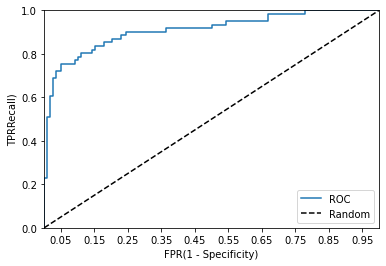

In [45]:
roc_curve_plot(y_test,pred_proba_c1)

In [18]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
round(roc_score,4)

0.9054

In [19]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print(f'오차행렬: \n {confusion}')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)}, \
    f1 score: {round(f1,4)}, auc: {round(roc_auc,4)}')

In [20]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬: 
 [[107  11]
 [ 14  47]]
정확도: 0.8603, 정밀도: 0.8103, 재현율: 0.7705, f1 score: 0.7899, auc: 0.9054


[과제] train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- dt 모델을 적용하고 GridSearchCV를 사용, 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝
- accuracy에 추가하여 confusion matrix, accuracy, precision, recall, roc auc score 평가


In [20]:
tdf = pd.read_csv('./dataset/train.csv')
y_tdf = tdf['Survived']
X_tdf = tdf.drop('Survived', axis = 1) # 컬럼삭제
X_tdf = transform_features(X_tdf)
X_tdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,0.014151,4,2
1,1,0,38.0,1,0,0.139136,2,0
2,3,0,26.0,0,0,0.015469,5,2
3,1,0,35.0,1,0,0.103644,2,2
4,3,1,35.0,0,0,0.015713,5,2


In [23]:
# df 모델을 적용하고 GridSearchCV를 사용, 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X_tdf, y_tdf, test_size = 0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11) # 객체 생성
dt_clf.fit(X_train, y_train) # 학습
dt_pred = dt_clf.predict(X_test) # 예측
print('dt_clf :' , accuracy_score(y_test, dt_pred)) # 정확도 측정

dt_clf : 0.770949720670391


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_tdf, y_tdf, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(iter_count, accuracy)
print(np.mean(scores))

0 0.7094972067039106
1 0.797752808988764
2 0.8202247191011236
3 0.7696629213483146
4 0.7696629213483146
0.7733601154980855


In [34]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 딕셔너리 형태로 설정
# decisiontreeclassifier의 중요 하이퍼 파라미터들을 변화시키면서 최적화 수행
parameters = {'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]
             }

# GridSearchCV 주요 파라미터 -> estimator, param_gird, scoring, cv, refit(true가 default)
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, refit=True)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: ',grid_dclf.best_score_)

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.807633211858564
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8827


In [56]:
# accuracy에 추가하여 confusion martix, accuracy, precision, recall, roc auc score평가
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
pred_proba = dt_clf.predict_proba(X_test)[:,1] # predict_proba -> 0이냐 1이냐 확률을 반환해줌

def get_clf_evals(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
# ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
# ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도 : {1:.4f},  재현율 : {2:.4f},  F1:{3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
get_clf_evals(y_test, dt_pred, pred_proba)

오차 행렬
[[92 26]
 [15 46]]
정확도: 0.7709, 정밀도 : 0.6389,  재현율 : 0.7541,  F1:0.6917, AUC:0.7658


[과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가<BR>
※ 피처 정보
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린), 'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'


- 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
- 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생


In [40]:
diabetes_data = pd.read_csv('./dataset/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
